In [1]:
#First, install the necessary packages!
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#Second, input the data!
address = '//prc-cs-f9dkb42/ecozzolino$/Desktop/code/untitled.csv'
insur = pd.read_csv(address)

In [4]:
#Next, I'll take a look at the data
insur.head(20)

,Salary Grade,Segment,Unplanned Shrink Pct,Planned Shrink Pct,Avg Unadjusted Adherence Pct,Avg ACW,Avg Handle Time,Avg Inbound Talk Time,Hold Time Pct,Num Inbound,...,Time Aux2,Time Aux3,Time Aux4,Time Aux6,Time Aux5,Time Aux7,Time Aux8,Time Login,EmploymentDate,EmployeeID_2
0,29.0,FDS,8.814193,34.013132,78.593396,4.648122,12.624061,7.975939,6.735367,701,...,1022.066653,249.433324,618.233325,0.000000,359.699998,23.333332,68.166665,16343.249990,11/2/2015,usw9062aad1
1,30.0,FDS,8.994043,35.573911,71.054286,3.399823,10.954637,7.554815,15.763677,1222,...,1487.766655,130.599992,864.716654,13.916666,5078.583325,1.600000,0.000000,33912.349990,11/2/2015,usw9074aad4
2,29.0,FDS,10.713797,27.673321,81.248113,3.503166,12.331533,8.828367,15.185973,1074,...,1641.999985,256.266660,713.383321,30.533333,2260.033328,17.533332,77.166665,28586.716650,7/24/2017,usw9022aad8
3,28.0,SPSO,5.067218,48.948638,90.421489,0.895973,5.999292,5.103319,17.884134,1130,...,529.583325,192.799994,404.383324,0.000000,0.000000,0.000000,0.000000,21415.783320,11/30/2015,usw9051abw5
4,29.0,SPSO,1.898938,67.186997,92.030714,0.511770,5.211268,4.699498,16.180222,531,...,273.883330,91.033329,101.916663,31.299998,139.433332,0.000000,0.000000,6728.033329,11/30/2015,usw9092abw5
5,29.0,SPSO,2.811161,42.063459,83.798333,0.499741,4.788709,4.288967,9.669873,1417,...,654.249991,15.966665,250.266664,0.000000,200.300000,18.883332,0.000000,25829.066650,12/7/2015,usw9065ada9
6,30.0,SPSO,7.629961,60.648407,89.861429,0.350502,4.654610,4.304108,13.115598,564,...,244.049996,5.133333,96.033331,8.816666,0.000000,0.000000,0.000000,6705.299996,12/7/2015,usw9046ada9
7,30.0,SPSO,7.992044,32.330116,88.313333,0.929945,4.640582,3.710637,6.401854,2858,...,1865.849983,725.216650,901.066660,1456.583329,1454.649998,449.399987,28.933333,26203.816650,12/7/2015,usw9049adc7
8,29.0,SPSO,22.782705,13.858093,69.995455,0.867359,3.881471,3.014112,5.886034,698,...,214.249997,86.666663,102.783330,0.000000,314.566666,180.983330,0.000000,4684.249995,12/7/2015,usw9035add2
9,28.0,SPSO,18.563213,15.555765,81.204545,0.843851,5.038380,4.194529,5.690194,1179,...,456.299994,82.749997,245.583330,0.000000,43.566666,122.766662,0.000000,8688.583327,12/7/2015,usw9043add3


In [5]:
#These column names are kind of confusing, so I'll rename them 
insur.columns = ['salary', 'segment', 'unplan_shrink', 'plan_shrink', 'avg_un_ad', 'acw', 'handle_time', 'inbound_time', 'hold_time', 'num_inbound', 'num_outbound', 'cold_trans', 'warm_trans', 'aux_unspec', 'aux_nonphone', 'aux_break', 'aux_pers', 'aux_mtg', 'aux_train', 'aux_corp', 'aux_comp', 'aug_mgmt', 'time_log', 'emp_start', 'id']

In [6]:
insur.head(20)

,salary,segment,unplan_shrink,plan_shrink,avg_un_ad,acw,handle_time,inbound_time,hold_time,num_inbound,...,aux_break,aux_pers,aux_mtg,aux_train,aux_corp,aux_comp,aug_mgmt,time_log,emp_start,id
0,29.0,FDS,8.814193,34.013132,78.593396,4.648122,12.624061,7.975939,6.735367,701,...,1022.066653,249.433324,618.233325,0.000000,359.699998,23.333332,68.166665,16343.249990,11/2/2015,usw9062aad1
1,30.0,FDS,8.994043,35.573911,71.054286,3.399823,10.954637,7.554815,15.763677,1222,...,1487.766655,130.599992,864.716654,13.916666,5078.583325,1.600000,0.000000,33912.349990,11/2/2015,usw9074aad4
2,29.0,FDS,10.713797,27.673321,81.248113,3.503166,12.331533,8.828367,15.185973,1074,...,1641.999985,256.266660,713.383321,30.533333,2260.033328,17.533332,77.166665,28586.716650,7/24/2017,usw9022aad8
3,28.0,SPSO,5.067218,48.948638,90.421489,0.895973,5.999292,5.103319,17.884134,1130,...,529.583325,192.799994,404.383324,0.000000,0.000000,0.000000,0.000000,21415.783320,11/30/2015,usw9051abw5
4,29.0,SPSO,1.898938,67.186997,92.030714,0.511770,5.211268,4.699498,16.180222,531,...,273.883330,91.033329,101.916663,31.299998,139.433332,0.000000,0.000000,6728.033329,11/30/2015,usw9092abw5
5,29.0,SPSO,2.811161,42.063459,83.798333,0.499741,4.788709,4.288967,9.669873,1417,...,654.249991,15.966665,250.266664,0.000000,200.300000,18.883332,0.000000,25829.066650,12/7/2015,usw9065ada9
6,30.0,SPSO,7.629961,60.648407,89.861429,0.350502,4.654610,4.304108,13.115598,564,...,244.049996,5.133333,96.033331,8.816666,0.000000,0.000000,0.000000,6705.299996,12/7/2015,usw9046ada9
7,30.0,SPSO,7.992044,32.330116,88.313333,0.929945,4.640582,3.710637,6.401854,2858,...,1865.849983,725.216650,901.066660,1456.583329,1454.649998,449.399987,28.933333,26203.816650,12/7/2015,usw9049adc7
8,29.0,SPSO,22.782705,13.858093,69.995455,0.867359,3.881471,3.014112,5.886034,698,...,214.249997,86.666663,102.783330,0.000000,314.566666,180.983330,0.000000,4684.249995,12/7/2015,usw9035add2
9,28.0,SPSO,18.563213,15.555765,81.204545,0.843851,5.038380,4.194529,5.690194,1179,...,456.299994,82.749997,245.583330,0.000000,43.566666,122.766662,0.000000,8688.583327,12/7/2015,usw9043add3


In [9]:
#Look at the average values of these variable
insur.mean()

salary              29.593290
unplan_shrink       11.627850
plan_shrink         24.822382
avg_un_ad           81.777867
acw                  2.699421
handle_time         10.925948
inbound_time         8.226527
hold_time           15.366958
num_inbound       1150.264105
num_outbound       151.896975
cold_trans           7.455591
warm_trans           4.377559
aux_unspec        1068.790160
aux_nonphone      1866.035153
aux_break         1263.387803
aux_pers           290.893450
aux_mtg           1036.915947
aux_train          307.451103
aux_corp          1576.516555
aux_comp           127.905067
aug_mgmt           225.707208
time_log         23284.502097
dtype: float64

In [10]:
#Check for missing data
insur.isnull().any()

salary            True
segment          False
unplan_shrink     True
plan_shrink       True
avg_un_ad         True
acw               True
handle_time       True
inbound_time      True
hold_time         True
num_inbound      False
num_outbound     False
cold_trans        True
warm_trans        True
aux_unspec       False
aux_nonphone     False
aux_break        False
aux_pers         False
aux_mtg          False
aux_train        False
aux_corp         False
aux_comp         False
aug_mgmt         False
time_log         False
emp_start         True
id               False
dtype: bool

In [11]:
#Write a function that creates a dummy variable for whether or not each observation is missing
    #on each column. This way, we have this information in case missingness is informative
for col in insur.columns:
    insur[col+"_missing"] = insur[col].isnull()

SyntaxError: invalid syntax (<ipython-input-11-3aef40044ada>, line 1)

In [15]:
#Fill in missing values with 0 and create a new dataframe without any missing data
insur_nomiss=insur.fillna(0)

In [16]:
#Check to make sure it filled in
insur_nomiss.isnull().any()

salary                   False
segment                  False
unplan_shrink            False
plan_shrink              False
avg_un_ad                False
acw                      False
handle_time              False
inbound_time             False
hold_time                False
num_inbound              False
num_outbound             False
cold_trans               False
warm_trans               False
aux_unspec               False
aux_nonphone             False
aux_break                False
aux_pers                 False
aux_mtg                  False
aux_train                False
aux_corp                 False
aux_comp                 False
aug_mgmt                 False
time_log                 False
emp_start                False
id                       False
salary_missing           False
segment_missing          False
unplan_shrink_missing    False
plan_shrink_missing      False
avg_un_ad_missing        False
acw_missing              False
handle_time_missing      False
inbound_

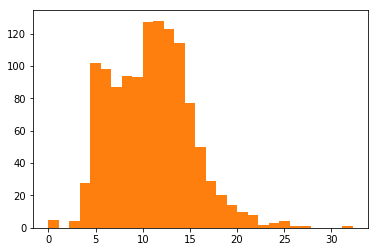

In [18]:
#The key dependent variable is handle_time. Next, I'll take a look at the distribution of this variable
plt.hist(insur_nomiss['handle_time'], bins='auto')
plt.show()

In [21]:
#This variable has a relatively normal distribution, so linear regression seems appropriate
#Now, to think about what variables to include in this regression.

#The instructions say that handle_time is the sum of after call work time (acw) and inbound talk time 
    #(inbound_time). Let's test that to make sure. 
    # If this is true, we won't want to include acw or inbound_time in the regression.

#Create a new variable that adds acw to inbound_time
insur_nomiss['handle_sum'] = insur_nomiss['acw'] + insur_nomiss['inbound_time']

#Look at the mean of this variable
insur_nomiss['handle_sum'].mean()

10.881278955831544

In [22]:
#Compare this to the mean of handle_time
insur_nomiss['handle_time'].mean()

10.881278955883893

In [24]:
#We can see that they are pretty much the same, so acw and inbound_time do not belong in the regression

#We also don't want employee id or start date in the regression, since these are not numerical 
#variables. Nor do we want our binary missing indicators.

#Next, I'll create a new dataframe with only the variables that can go into the regression.

insur_trimNomiss = insur_nomiss[['salary', 'unplan_shrink', 'plan_shrink', 'avg_un_ad', 'handle_time', 'hold_time', 'num_inbound', 'num_outbound', 'cold_trans', 'warm_trans', 'aux_unspec', 'aux_nonphone', 'aux_break', 'aux_pers', 'aux_mtg', 'aux_train', 'aux_corp', 'aux_comp', 'aug_mgmt', 'time_log']]

In [25]:
insur_trimNomiss.head(20)

,salary,unplan_shrink,plan_shrink,avg_un_ad,handle_time,hold_time,num_inbound,num_outbound,cold_trans,warm_trans,aux_unspec,aux_nonphone,aux_break,aux_pers,aux_mtg,aux_train,aux_corp,aux_comp,aug_mgmt,time_log
0,29.0,8.814193,34.013132,78.593396,12.624061,6.735367,701,75,0.855920,6.990014,237.333322,0.000000,1022.066653,249.433324,618.233325,0.000000,359.699998,23.333332,68.166665,16343.249990
1,30.0,8.994043,35.573911,71.054286,10.954637,15.763677,1222,261,4.828151,12.111293,559.966655,157.949996,1487.766655,130.599992,864.716654,13.916666,5078.583325,1.600000,0.000000,33912.349990
2,29.0,10.713797,27.673321,81.248113,12.331533,15.185973,1074,304,2.700186,7.728119,2023.883317,0.000000,1641.999985,256.266660,713.383321,30.533333,2260.033328,17.533332,77.166665,28586.716650
3,28.0,5.067218,48.948638,90.421489,5.999292,17.884134,1130,34,4.336283,0.265487,11570.083320,46.916663,529.583325,192.799994,404.383324,0.000000,0.000000,0.000000,0.000000,21415.783320
4,29.0,1.898938,67.186997,92.030714,5.211268,16.180222,531,13,4.896422,0.188324,2763.899995,79.416664,273.883330,91.033329,101.916663,31.299998,139.433332,0.000000,0.000000,6728.033329
5,29.0,2.811161,42.063459,83.798333,4.788709,9.669873,1417,3,3.175723,0.000000,15637.449990,44.899999,654.249991,15.966665,250.266664,0.000000,200.300000,18.883332,0.000000,25829.066650
6,30.0,7.629961,60.648407,89.861429,4.654610,13.115598,564,4,3.546099,0.000000,3125.083331,12.650000,244.049996,5.133333,96.033331,8.816666,0.000000,0.000000,0.000000,6705.299996
7,30.0,7.992044,32.330116,88.313333,4.640582,6.401854,2858,177,18.509447,0.699790,639.999986,1417.849989,1865.849983,725.216650,901.066660,1456.583329,1454.649998,449.399987,28.933333,26203.816650
8,29.0,22.782705,13.858093,69.995455,3.881471,5.886034,698,65,15.616046,0.143266,163.533330,131.266665,214.249997,86.666663,102.783330,0.000000,314.566666,180.983330,0.000000,4684.249995
9,28.0,18.563213,15.555765,81.204545,5.038380,5.690194,1179,97,13.910093,0.424088,219.949996,317.099995,456.299994,82.749997,245.583330,0.000000,43.566666,122.766662,0.000000,8688.583327


In [26]:
#Next, I'll designate the outcome variable as y (handle_time) and the remaining variables
    #as a vector of indepdent variables, X.
y=insur_trimNomiss['handle_time']
X=insur_trimNomiss.drop(['handle_time'], axis=1)

In [27]:
#Now I'll run a linear regression and look at the results.
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            handle_time   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1022.
Date:                Wed, 04 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:46:10   Log-Likelihood:                -3003.3
No. Observations:                1223   AIC:                             6045.
Df Residuals:                    1204   BIC:                             6142.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
salary            0.2374      0.017     13.897      0.000       0.204       0.271
unplan_shrink    -0.0289      0.009     -3.052      0.002      -0.048      -0.010
plan_shrink      -0.0495      0.009     -5.825      0.000      -0.066      -0.033
avg_un_ad         0.0531      0.005      9.844      0.000       0.043       0.064
hold_time         0.0417      0.009      4.550      0.000       0.024       0.060
num_inbound      -0.0034      0.000    -24.603      0.000      -0.004      -0.003
num_outbound      0.0004      0.001      0.523      0.601      -0.001       0.002
cold_trans       -0.0116      0.016     -0.717      0.474      -0.044       0.020
warm_trans        0.1699      0.020      8.336      0.000       0.130       0.210
aux_unspec     8.203e-05   5.82e-05      1.411      0.159   -3.21e-05       0.000
aux_nonphone     -0.0002    2.5e-05     -7.440      0.000      -0.000      -0.000
aux_break         0.0014      0.000      3.734      0.000       0.001       0.002
aux_pers      -3.411e-05      0.000     -0.111      0.912      -0.001       0.001
aux_mtg          -0.0003      0.000     -2.588      0.010      -0.001   -7.63e-05
aux_train     -8.056e-05   6.92e-05     -1.164      0.245      -0.000    5.52e-05
aux_corp          0.0003   4.38e-05      6.762      0.000       0.000       0.000
aux_comp         -0.0007      0.000     -1.520      0.129      -0.002       0.000
aug_mgmt      -2.103e-05      0.000     -0.204      0.838      -0.000       0.000
time_log       9.637e-05   2.45e-05      3.928      0.000    4.82e-05       0.000
==============================================================================
Omnibus:                      160.976   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1514.635
Skew:                          -0.221   Prob(JB):                         0.00
Kurtosis:                       8.434   Cond. No.                     7.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#There are a lot of significant variables! But, since this business problem is about REDUCING
    #handle time, I'll want to pay attention only to the POSITIVE significant variables
    #(factors that increase handle time):
    
    #1. Salary grade (coef = 0.23)
    #2. Average unadjusted adherence pct (avg_un_ad) (coef = 0.05)
    #3. Average inbound call hold time (hold_time) (coef = 0.04)
    #4. Percent of calls warm transferred to another rep (warm_trans) (coef = 0.17)
    #5. Break time (aux_break) (coef = 0.001)
    #6. Corporate time (aux_corp) (coef = 0.003)
    #7. Time logged into the phone system (time_log) (coef = 0.00009)
    
#Takeaways:

    #Two biggest impacts: salary grade and warm transfers

    # - more senior people take longer to handle calls. This could be b/c they gather more 
        #information, or have more suggestions for callers, that more junior people may be unaware of
            #- could have more junior people manning the phones to reduce time, but this could
            # result in a worse customer experience, so I'd think carefully about this.
        
    # - percent of calls warm transferred to another rep also increase handle_time. Maybe implementing
        # a new, more streamlined phone system could reduce the warm transfer percentage
        
    #Smaller in magnitude:
        # average unadjusted adherence pct - makes sense, b/c the more time in a phone state, the
        # more time they are on the phone, hence increased handle_time
        
        #average inbound call hold time - also makes sense - being on hold adds to total handle_time
        
        #break time: small impact on handle_time
        #corporate time: small impact on handle_time
        #time logged in: small impact on handle_time

10.925947588707718

In [28]:
insur_trimnom2 = insur_nomiss[['salary', 'unplan_shrink', 'plan_shrink', 'avg_un_ad', 'handle_time', 'hold_time', 'num_inbound', 'num_outbound', 'cold_trans', 'warm_trans', 'time_log']]

In [31]:
y=insur_trimnom2['handle_time']
X=insur_trimnom2.drop(['handle_time'], axis=1)

In [32]:
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            handle_time   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1691.
Date:                Wed, 04 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:28:43   Log-Likelihood:                -3087.0
No. Observations:                1223   AIC:                             6194.
Df Residuals:                    1213   BIC:                             6245.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
salary            0.2313      0.018     12.995      0.000       0.196       0.266
unplan_shrink    -0.0408      0.010     -4.268      0.000      -0.060      -0.022
plan_shrink      -0.0542      0.008     -7.000      0.000      -0.069      -0.039
avg_un_ad         0.0457      0.005      8.681      0.000       0.035       0.056
hold_time         0.0871      0.009     10.038      0.000       0.070       0.104
num_inbound      -0.0031      0.000    -23.766      0.000      -0.003      -0.003
num_outbound      0.0001      0.001      0.171      0.864      -0.001       0.001
cold_trans        0.0251      0.017      1.503      0.133      -0.008       0.058
warm_trans        0.2051      0.021      9.887      0.000       0.164       0.246
time_log          0.0001   1.19e-05     11.983      0.000       0.000       0.000
==============================================================================
Omnibus:                      119.726   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.113
Skew:                          -0.011   Prob(JB):                    1.67e-182
Kurtosis:                       7.053   Cond. No.                     6.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
insur_trimNomiss['salary'].describe()

count    1223.000000
mean       29.569092
std         1.137773
min         0.000000
25%        29.000000
50%        30.000000
75%        30.000000
max        32.000000
Name: salary, dtype: float64

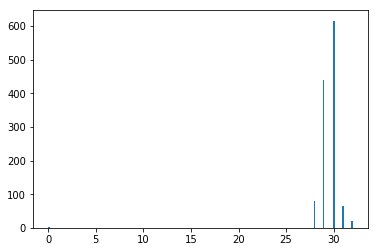

In [34]:
plt.hist(insur_nomiss['salary'], bins='auto')
plt.show()

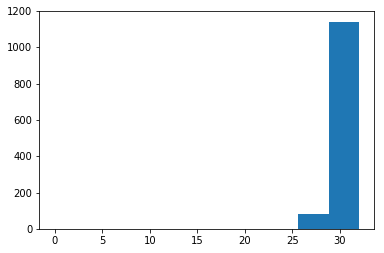

In [35]:
plt.hist(insur_nomiss['salary'])
plt.show()